In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X: (100, 2)
dimensions de y: (100, 1)


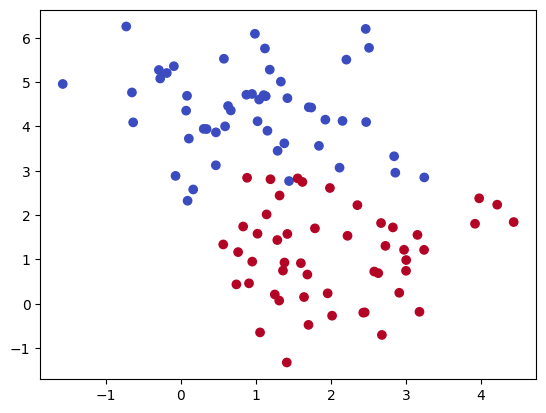

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("dimensions de X:", X.shape)
print("dimensions de y:", y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

In [3]:
def initialisation(X):
    """Initialisation des paramètres W et b de la régression logistique"""
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
def model(X, W, b):
    """Retourne la fonction d'activation de la couche de sortie"""
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [26]:
def log_loss(A,y):
    """Retourne la log loss"""
    return -np.mean(y*np.log(A+ 1e-5) + (1-y)*np.log(1-A+ 1e-5))

In [28]:
def gradients(A, X, y):
    """Retourne les gradients de la log loss par rapport à W et b"""
    dW = 1 / len(y) * np.dot(X.T, A - y)  # dérivée de la log loss par rapport à W, voir formulaire pdf
    db = np.mean(A - y) # dérivée de la log loss par rapport à b, voir formulaire pdf
    return (dW, db)

    

In [29]:
def update(dW, db, W, b, alpha):
    W = W - alpha*dW
    b = b - alpha*db
    return (W, b)

In [38]:
def predict(X, W, b):
    A = model(X, W, b) # activation (sorties du réseau de neurones)
    return A>=0.5

In [31]:
def artificial_neural_network(X, y, learning_rate=0.01, n_iter=1000):
    # Initialisation des paramètres
    W, b = initialisation(X)

    history = []
    Loss = []
    

    # Boucle d'apprentissage
    for i in range(n_iter):
        # Forward
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        # Backward
        dW, db = gradients(A, X, y)
        # Mise à jour des paramètres
        W, b = update(dW, db, W, b, learning_rate)
        history.append((W, b, Loss, i))
    
    y_pred = predict(X, W, b)
    print("Accuracy:" , accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return W, b, history # retourne les paramètres appris

[[0.94538048]
 [0.83400991]
 [0.00738679]
 [0.20560965]
 [0.95525371]
 [0.37249794]
 [0.07607082]
 [0.92028955]
 [0.05765301]
 [0.90436707]
 [0.0361003 ]
 [0.89638836]
 [0.02459753]
 [0.02367409]
 [0.74164355]
 [0.97131997]
 [0.99018365]
 [0.04693748]
 [0.81374797]
 [0.70272867]
 [0.04557627]
 [0.04177255]
 [0.43310323]
 [0.00699093]
 [0.95098496]
 [0.03437332]
 [0.92151405]
 [0.00807027]
 [0.06276755]
 [0.73329026]
 [0.97999451]
 [0.04556124]
 [0.7485712 ]
 [0.98023067]
 [0.42048024]
 [0.2009261 ]
 [0.82367468]
 [0.54995566]
 [0.44995   ]
 [0.56452775]
 [0.10348621]
 [0.05047388]
 [0.00122162]
 [0.17249467]
 [0.23822126]
 [0.84283763]
 [0.97229899]
 [0.97025046]
 [0.0073059 ]
 [0.01023936]
 [0.94865438]
 [0.65827892]
 [0.03013447]
 [0.03837671]
 [0.76403983]
 [0.04322782]
 [0.66105081]
 [0.85510881]
 [0.94233249]
 [0.99115724]
 [0.6973979 ]
 [0.16238877]
 [0.00643278]
 [0.92014944]
 [0.01344266]
 [0.38320608]
 [0.04952834]
 [0.55588541]
 [0.92971831]
 [0.26056613]
 [0.18829897]
 [0.93

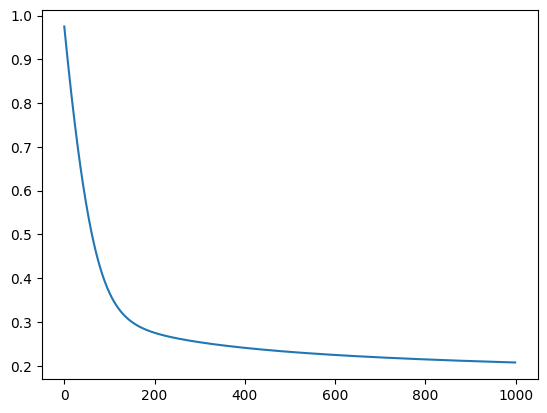

In [32]:
# courbe d'apprentissage
W, b, history = artificial_neural_network(X, y)


Les erreurs décroissent, l'apprentissage fonctionne. La fonction de coût converge.

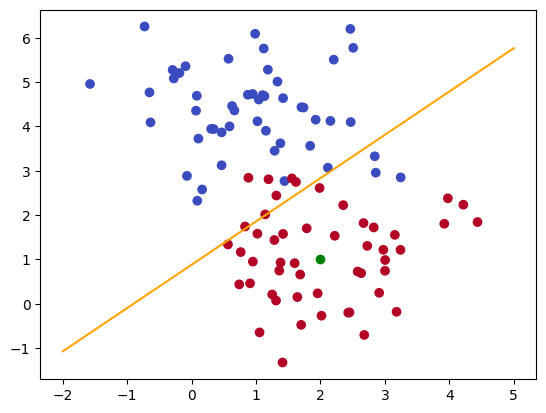

[0.8939967]


array([ True])

In [22]:
# frontière de décision est le point où la probabilité de la fonction d'activation est de 0.5
# donc on cherche le point où W1*x1 + W2*x2 + b = 0

x1 = np.linspace(-2, 5, 100)
x2 = -(W[0]*x1 + b) / W[1]
plt.plot(x1, x2, c='orange')


new_plant = np.array([2,1]) # nouvelle plante à prédire
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.scatter(new_plant[0], new_plant[1], c='green')
plt.show()
predict(new_plant, W, b)


In [23]:
import plotly.graph_objects as go

In [19]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:,0].flatten(),
    y=X[:,1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(), 
        colorscale='Viridis',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template='plotly_dark', margin=dict(l=0, r=0, b=0, t=0) ,title="Données")
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


In [20]:
X0 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
X1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0]*xx0 + W[1]*xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='Viridis', opacity=0.8, reversescale=True)]))

fig.add_scatter3d(x=X[:,0].flatten(), y=X[:,1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='Viridis', opacity=0.9, reversescale=True))

fig.update_layout(template='plotly_dark', margin=dict(l=0, r=0, b=0, t=0), title="Frontière de décision")
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [21]:
def animate(params, ax):
    W = params[0]
    b = params[1]
    loss = params[2]
    i = params[3]

    ax[0].clear()
    ax[1].clear()
    ax[2].clear()

    s = 300
    # frontière de décision
    ax[0].scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=s, edgecolor='k', linewidth=3)

    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()

    x1 = np.linspace(-3, 6, 100)
    x2 = -(W[0]*x1 + b) / W[1]
    ax[0].plot(x1, x2, c='orange', lw=4)

    ax[0].set_xlim(X[:,0].min(), X[:,0].max())
    ax[0].set_ylim(X[:,1].min(), X[:,1].max())
    ax[0].set_title("Frontière de décision")
    ax[0].set_xlabel("X1")
    ax[0].set_ylabel("X2")

    # sigmoid
    z = X.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new))
    ax[1].plot(z_new, A, c='orange', lw=4)
    ax[1].scatter(z[y==0], np.zeros(z[y==0].shape), c='purple', edgecolor='k', linewidth=3, s=s)
    ax[1].scatter(z[y==1], np.ones(z[y==1].shape), c='yellow', edgecolor='k', linewidth=3, s=s)
    # ax[1].vlines(0, 0, 1, color='red', linestyle='--') # seuil de décision
    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_title("Sigmoid")
    ax[1].set_xlabel("Z")
    ax[1].set_ylabel("A(Z)")

    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(z[y==0][j],ymin=0, ymax= 1/(1+np.exp(-z[y==0][j])), color='red', alpha=0.5, zorder=-1)

    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(z[y==1][j],ymax=0,ymin= 1/(1+np.exp(-z[y==1][j])), color='red', alpha=0.5, zorder=-1)

    ax[2].plot(range(i), loss[:i], c="red", lw=4)
    ax[2].set_xlim(loss[-1]*0.8,len(loss))
    ax[2].set_ylim(0, loss[0]*1.1)
    ax[2].set_xlabel("Itérations")
    ax[2].set_title("Fonction coût")
    ax[2].set_ylabel("Log Loss")


In [22]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(1, 3, figsize=(40, 10))
plt.rcParams['animation.ffmpeg_path'] = r'D:\Applications\ffmpeg-7.0.1-essentials_build\bin\ffmpeg.exe'
ani = FuncAnimation(fig, animate, frames=history, fargs=(ax,), interval=200, repeat=False)



Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=3200)
ani.save('neural_network.mp4', writer=writer)

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000001FC1D30EE80>
Traceback (most recent call last):
  File "c:\Users\markz\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
                                                       ^^^^^^
KeyboardInterrupt: 


In [33]:
from utilities import *
from matplotlib import pyplot as plt

In [34]:
X_train, y_train, X_test, y_test = load_data()

In [35]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1) / X_train.max() # X - Xmin / (Xmax - Xmin)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1) / X_train.max() 


[[4.35219443e-03]
 [7.45257479e-03]
 [2.52129578e-04]
 [5.48736942e-02]
 [9.96555874e-01]
 [8.17408687e-01]
 [2.68851356e-01]
 [5.60106249e-04]
 [8.13223994e-01]
 [6.22496706e-02]
 [8.51282885e-02]
 [8.68465829e-01]
 [8.54741749e-01]
 [6.14329872e-01]
 [9.99984157e-01]
 [2.71807877e-01]
 [3.62766168e-01]
 [9.90563165e-01]
 [3.97344125e-01]
 [2.76015085e-03]
 [1.69195360e-01]
 [9.99998894e-01]
 [2.25943803e-01]
 [7.16553773e-03]
 [9.46627914e-01]
 [9.87603341e-01]
 [8.00053356e-01]
 [3.33360459e-03]
 [7.75652086e-01]
 [7.71046799e-01]
 [8.31201071e-01]
 [2.37164365e-02]
 [3.87692188e-01]
 [3.27869824e-02]
 [1.50349088e-01]
 [6.27806407e-01]
 [1.39436523e-02]
 [1.81041737e-01]
 [6.67849959e-01]
 [1.53879733e-02]
 [8.52835379e-02]
 [1.44894221e-01]
 [8.84132568e-01]
 [9.50563913e-01]
 [5.28686241e-02]
 [3.61898097e-03]
 [3.27221311e-01]
 [7.93018946e-01]
 [9.99932265e-01]
 [4.49243909e-01]
 [9.97409684e-01]
 [1.51581770e-01]
 [9.73397462e-01]
 [2.60245777e-01]
 [2.43810454e-01]
 [7.403127

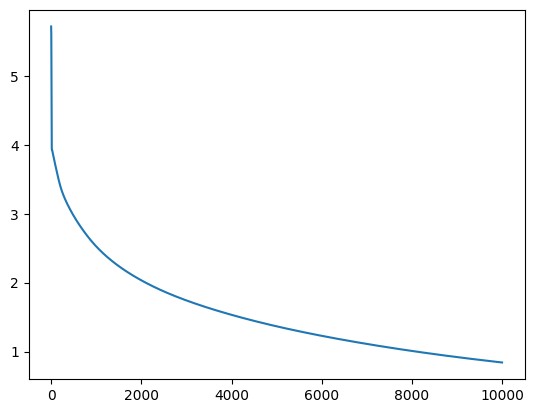

In [37]:
W, b , history= artificial_neural_network(X_train_reshaped, y_train, learning_rate=0.01, n_iter=10000)